(730, 16)
Number of empty Columns:
0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
None
instant         int64
dteday         object
season 

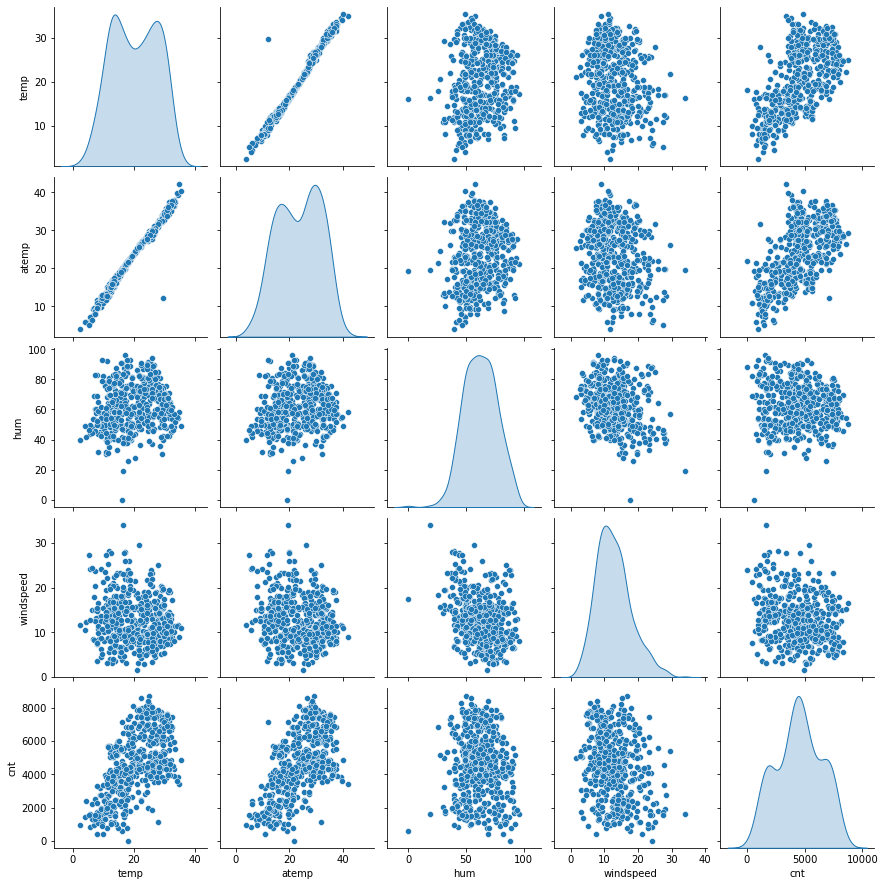

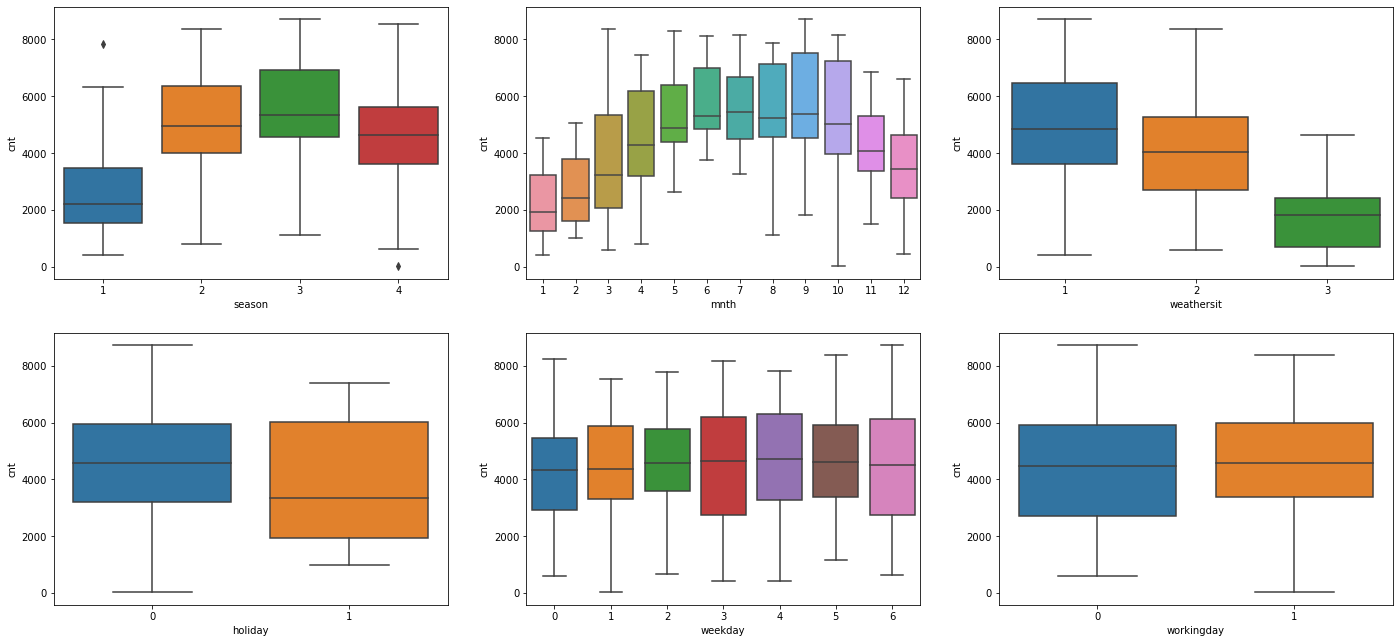

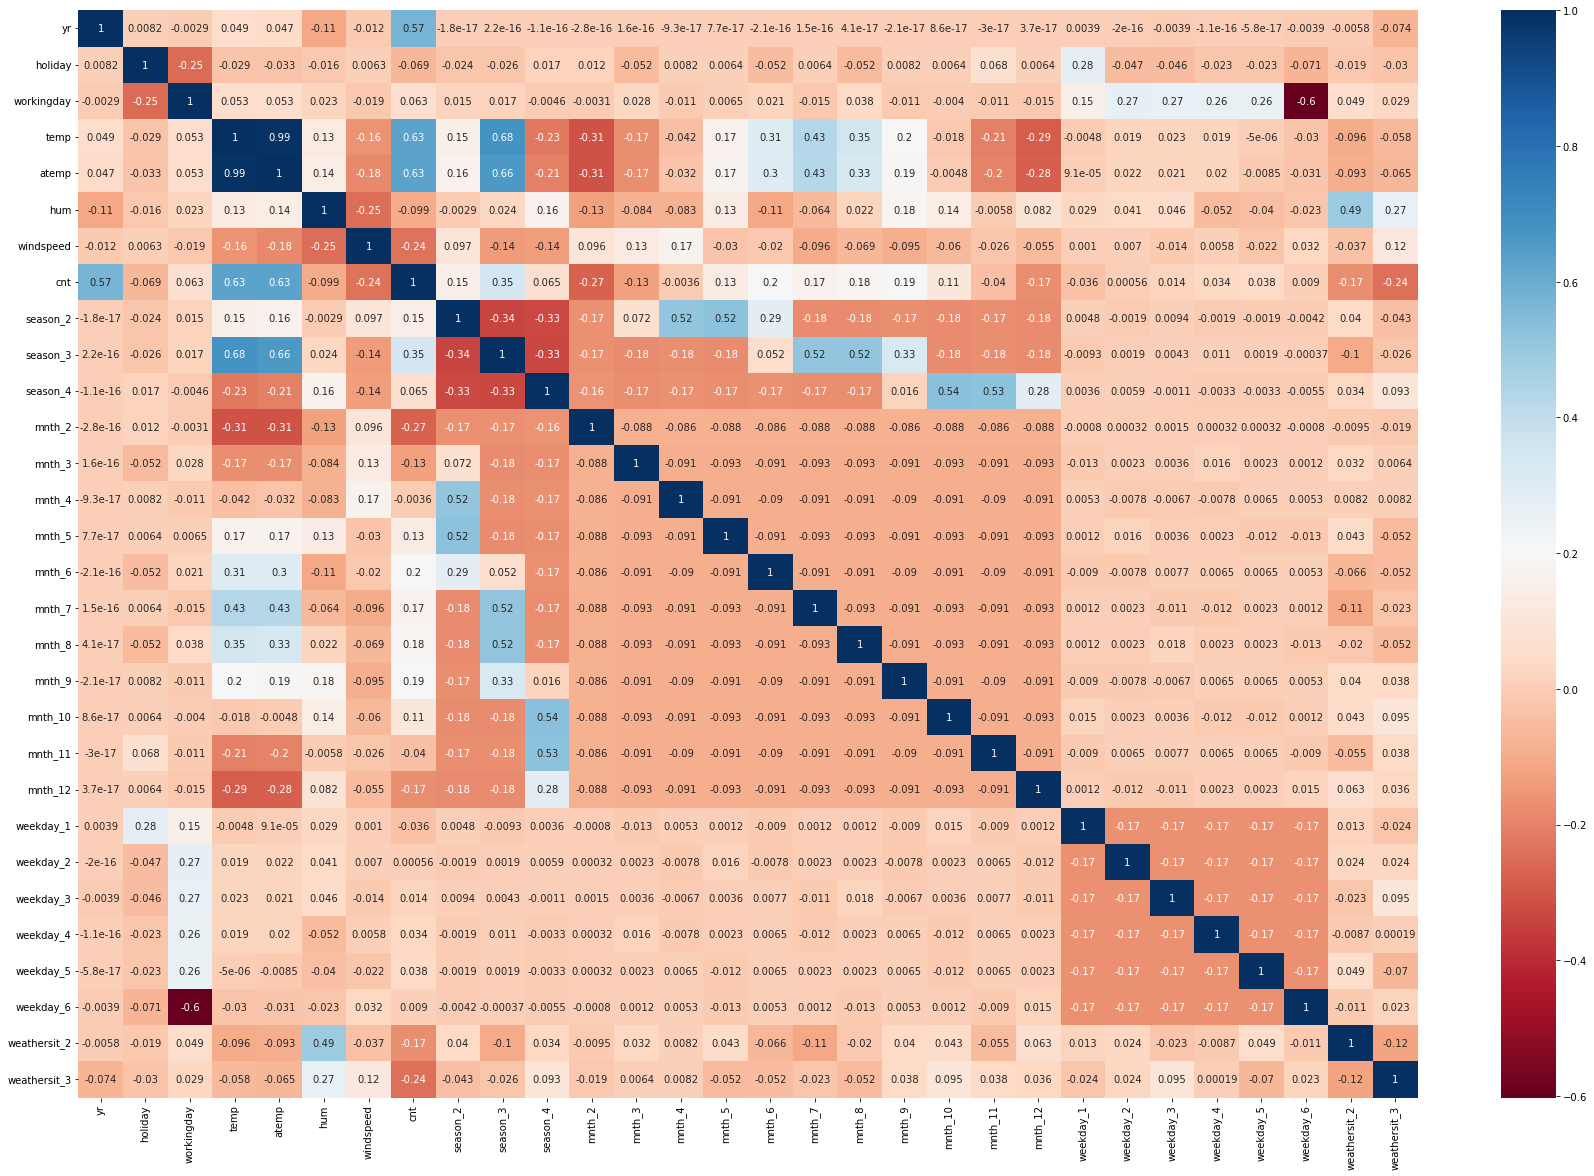

     yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
483   1        0           0  18.791653  22.50605  58.7083   7.832836  6304   
650   1        0           0  16.126653  19.56980  49.4583   9.791514  7109   
212   0        0           1  31.638347  35.16460  55.0833  10.500039  4266   
714   1        0           0  14.862500  18.49690  83.8750   6.749714  3786   
8     0        0           0   5.671653   5.80875  43.4167  24.250650   822   

     season_2  season_3  ...  mnth_11  mnth_12  weekday_1  weekday_2  \
483         1         0  ...        0        0          0          0   
650         0         0  ...        0        0          0          0   
212         0         1  ...        0        0          1          0   
714         0         0  ...        0        1          0          0   
8           0         0  ...        0        0          0          0   

     weekday_3  weekday_4  weekday_5  weekday_6  weathersit_2  weathersit_3  
483          0

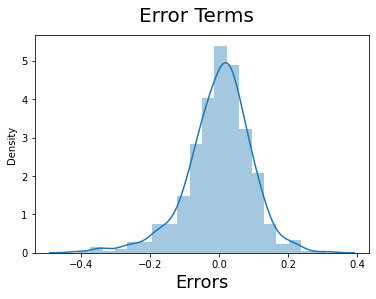

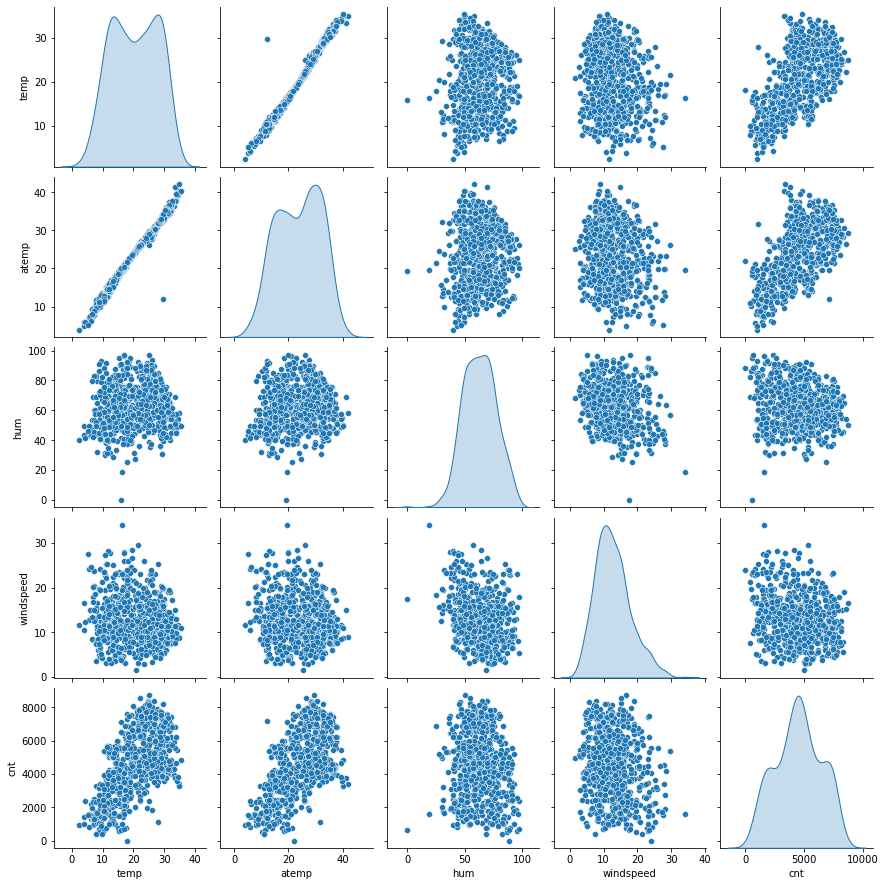

       Features   VIF
2          temp  4.72
3     windspeed  4.02
1    workingday  4.01
0            yr  2.00
7     weekday_6  1.65
4      season_2  1.56
8  weathersit_2  1.52
5      season_4  1.38
6        mnth_9  1.20
9  weathersit_3  1.07
     yr  holiday  workingday      temp     atemp       hum  windspeed  \
22    0        0           0  0.046591  0.025950  0.453529   0.462217   
468   1        0           0  0.543115  0.536771  0.522511   0.347424   
553   1        0           0  0.951196  0.933712  0.596104   0.212829   
504   1        0           0  0.699909  0.662746  0.551083   0.478229   
353   0        0           1  0.407087  0.416610  0.618615   0.080770   

          cnt  season_2  season_3  ...  mnth_11  mnth_12  weekday_1  \
22   0.110907         0         0  ...        0        0          0   
468  0.855729         1         0  ...        0        0          0   
553  0.534975         0         1  ...        0        0          0   
504  0.817648         1         0  

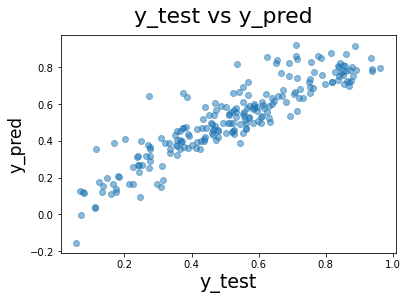

0.8203092200749708
(219, 10)
0.8116702402708829


In [3]:
#Import the required Lib for python programm for Bike assignment in Upgrad
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings due to version problems
import warnings
warnings.filterwarnings('ignore')

BikeML = pd.read_csv('D:\PythonEDA\BikeML\day.csv')

# check shape & datatype of Bike data set
print(BikeML.shape)
# sum and check number of  columns have all missing values
print('Number of empty Columns:')
print(BikeML.isnull().all(axis=0).sum())
# Observation: There are 0 columns have all missing value
print(BikeML.info())
print(BikeML.dtypes)
#Checking Duplicate values
print(BikeML.duplicated(subset=None, keep='first').count())
duplicate=BikeML[BikeML.duplicated(['instant'])]
print(duplicate)
# Findings in the data set
#Dataset has  16 columns and 730 row.
#Except one column, all other are either float or integer type.
#Only one  column is date type.
BikeML_dup = BikeML.copy()
# Checking for duplicates and dropping the entire duplicate row if any duplicates value is there
BikeML_dup.drop_duplicates(subset=None, inplace=True)
print(BikeML_dup.shape)
print(BikeML.shape)
#There is no duplicate rows as before and after duplicate row removal shape are same
# sum it up to check how many rows have all missing values
print('Number of empty Rows:')
print(BikeML.isnull().all(axis=1).sum())
# Observation: There are no empty rows in whole dataset.
#Data Cleaning
#  create a copy of the  dataframe, without the 'instant' column as this column have unique values, and donot make sense to do a value count on i ,

BikeML_dummy=BikeML.iloc[:,1:16]
for col in BikeML_dummy:
    print(BikeML_dummy[col].value_counts(ascending=False), '\n\n\n')
# There is no Junk or Unknown values in the entire Bike dataset.
#Removing unwanted columns instant,dteday ,casual & registered

#Observation : This column has only index value

#dteday : It is a date only, Since we have already have seperate columns for 'year' & 'month',hence this column we can remove/delete.

#casual & registered : Both these columns contains the count of bike booked by different categories of customers. 
#Since our target is to find the total count of bikes and not by any specific category, we will ignore these two columns. 
print(BikeML.columns)
#save the new dataframe as BikeML_new, so that the original dataset is preserved for any future analysis/validation.
BikeML_new=BikeML[['season', 'yr', 'mnth', 'holiday', 'weekday',
               'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
               'cnt']]

print(BikeML_new.shape)
print(BikeML_new.info())
print(BikeML_new.head(10))

# To visulize data in spread sheet we have downloaded the new data set into a sheet
#BikeML_new.to_csv('D:\PythonEDA\BikeML_new.csv')

#Creating Dummy Variables++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#We will create dummy variables for 4 categorical variables 'mnth', 'weekday', 'season' & 'weathersit'.
#Before creating dummy variables, we will have to convert them into 'category' data types.

BikeML_new['season']=BikeML_new['season'].astype('category')
BikeML_new['weathersit']=BikeML_new['weathersit'].astype('category')
BikeML_new['mnth']=BikeML_new['mnth'].astype('category')
BikeML_new['weekday']=BikeML_new['weekday'].astype('category')
print(BikeML_new.info())
 # above method will do follwing task+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# Create Dummy variable
#  Drop original variable for which the dummy was created
# Drop first dummy variable for each set of dummies created.

BikeML1_new = pd.get_dummies(BikeML_new, drop_first=True)
print(BikeML1_new.info())

#To check the data  in an xcel sheet to get proper view
#BikeML1_new.to_csv('D:\PythonEDA\BikeML1_new2.csv')
print(BikeML1_new.shape)


#we will Split the data to Train and Test:in (70:30 ratio)
#We will use train_test_split method from sklearn package for this

from sklearn.model_selection import train_test_split
np.random.seed(0)
BikeML1_train, BikeML1_test = train_test_split(BikeML1_new, train_size = 0.70, test_size = 0.30, random_state = 333)
print(BikeML1_train.info())
print(BikeML1_train.shape)
print(BikeML1_test.shape)
#EDA for data set
#First we need to perform the EDA on training data (BikeML1_train) Dataset.++++++++++++++++++++++++++++++++++++++++++++++
# Create a new dataframe of only numeric variables:
BikeML1_num=BikeML1_train[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]
sns.pairplot(BikeML1_num, diag_kind='kde')
plt.show()
#The Pair-Plot is telling us that there is a LINEAR RELATION between 'temp','atemp' and 'cnt'
# we will Build boxplot of all categorical variables (before creating dummies) againt the target variable 'cnt' to see how each of the predictor variable behaviour against the target variable.


plt.figure(figsize=(24, 11))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = BikeML)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = BikeML)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = BikeML)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = BikeML)

plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = BikeML)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = BikeML)
plt.show()

#The Data set has 6 categorical variables .
#From the Box plot to study their effect on the dependent variable (‘cnt’) .
#season:  almost around  32% of the bike booking were happening in season3 with a median of over 5000 booking (for the period of 2 years). This was followed by season2 & season4 with 27% & 25% of total booking. This indicates, season can be a good predictor for the dependent variable.
#mnth: almost around 10% of the bike booking were happening in the months 5,6,7,8 & 9 with a median of over 4000 booking per month. This indicates, mnth has some trend for bookings
# check the correlation coefficients to see which variables are highly correlated.
#Correlation Matrix
plt.figure(figsize = (30,20))
sns.heatmap(BikeML1_new.corr(), annot = True, cmap="RdBu")
plt.show()

# The heatmap is clearly showing  which all variable are multicollinear in nature
#We will refer this map back-and-forth while building the linear model so as to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model.

#Rescalling features 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Checking the values before scaling
print(BikeML1_train.head())
BikeML1_train.columns
# Apply scaler() to all the numeric variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
BikeML1_train[num_vars] = scaler.fit_transform(BikeML1_train[num_vars])
# Checking values after scaling
print(BikeML1_train.head())
print(BikeML1_train.describe())

# we will start Building A Linear Model one by one


# Divide into X and Y sets for the model building++++++++++++++++++++++++++++
y_train = BikeML1_train.pop('cnt')
X_train = BikeML1_train
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)
# running RFE
rfe = rfe.fit(X_train, y_train)
print(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
col = X_train.columns[rfe.support_]
print(col)
print(X_train.columns[~rfe.support_])
# Creating X_test dataframe with RFE selected variables

X_train_rfe = X_train[col]
#Model1  : we will check VIF 

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)
import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lrm1 = sm.OLS(y_train, X_train_lm1).fit()
# Check the parameters obtained

print(lrm1.params)
# Print a summary of the linear regression model obtained
print(lrm1.summary())

#Observation:variable 'atemp' based on its High p-value & High VIF

#Model 2
#we will remove the  variable 'atemp' based on its High p-value & High VIF
X_train_new = X_train_rfe.drop(["atemp"], axis = 1)
#Checking VIF
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a second fitted model
lrm2 = sm.OLS(y_train, X_train_lm2).fit()
# Check the parameters obtained

print(lrm2.params)
# Print a summary of the linear regression model obtained
print(lrm2.summary())
#Observation:'hum'  and 'temp' are having Very High 'VIF' value.
#Model 3
#Removing the variable 'hum' based on its Very High 'VIF' value.We know 'temp'can be an important factor for a business like bike rentals, and wanted to retain 'temp'.
X_train_new = X_train_new.drop(["hum"], axis = 1)
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a third  fitted model
lrm3 = sm.OLS(y_train, X_train_lm3).fit()
print(lrm3.params)
# Print a summary of the linear regression model obtained
print(lrm3.summary())

#Model 4
#Removing the variable 'season3' based on its Very High 'VIF' value.
X_train_new = X_train_new.drop(["season_3"], axis = 1)
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fourth model
lrm4 = sm.OLS(y_train, X_train_lm4).fit()
print(lrm4.params)
# Print a summary of the linear regression model obtained
print(lrm4.summary())

#Model 5
#Removing the variable 'mnth_10' based on its Very High p-value.
X_train_new = X_train_new.drop(["mnth_10"], axis = 1)

# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a fifth fitted model
lrm5 = sm.OLS(y_train, X_train_lm5).fit()
print(lrm5.params)
# Print a summary of the linear regression model obtained
print(lrm5.summary())


#Model 6
#Removing the variable 'mnth_3' based on its High 'p-value'.
X_train_new = X_train_new.drop(["mnth_3"], axis = 1)
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)
# Add a constant
X_train_lm6 = sm.add_constant(X_train_new)

# Create a sixth fitted model
lrm6 = sm.OLS(y_train, X_train_lm6).fit()
print(lrm6.params)
# Print a summary of the linear regression model obtained
print(lrm6.summary())
# model 6 looks good  so far , as there very low  Multicollinearity between the predictors and the p-values for all the predictors seems to be significant.
# For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number).
#Hypothesis Testing:
#Hypothesis testing states that:

#H0:B1=B2=...=Bn=0
#H1: at least one Bi!=0

#lr6 model coefficient values as below
#const 0.084143
#yr 0.230846
#windspeed -0.155191
#season_2 0.082706
#season_4 0.128744
#mnth_9 0.094743
#weekday_6 0.056909
#weathersit_2 -0.074807
#weathersit_3 -0.306992
#workingday 0.043203
#temp 0.563615


#Points we observed so far from the all 6 module analysis
#if we look properly into   model 6 summary, it is clear that all our coefficients are not equal to zero which means We can reject the NULL HYPOTHESIS

#F-Statistics is used for testing the overall significance of the Model: 
#Higher the F-Statistics, more significant the Model is.

#F-statistic: 233.8
#Prob (F-statistic): 3.77e-181
#The F-Statistics value of 233 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant

#best model on Model 6

#cnt = 0.084143 + (yr × 0.230846) + (workingday × 0.043203) + (temp × 0.563615) − (windspeed × 0.155191) + (season2 × 0.082706) + (season4 ×0.128744) + (mnth9 × 0.094743) + (weekday6 ×0.056909) − (weathersit2 × 0.074807) − (weathersit3 × 0.306992)

#we can interpreate of Coefficients as below:
#mnth_9:coefficient value of ‘0.094743’ wihich means that with respect to mnth_1, a unit increase in mnth_9 variable increases the bike hire numbers by 0.094743 units.

#weekday_6: coefficient value of ‘0.056909’ which means that with respect to weekday_1, a unit increase in weekday_6 variable increases the bike hire numbers by 0.056909 units.

#weathersit_2:coefficient value of ‘-0.074807’ which means that with respect to Weathersit1, a unit increase in Weathersit2 variable, decreases the bike hire numbers by 0.074807 units.

#temp: coefficient value of ‘0.5636’ which indicates that a unit increase in temp variable, increases the bike hire numbers by 0.5636 units.

#weathersit_3: coefficient value of ‘-0.3070’ which indicates that with respect to  Weathersit1, a unit increase in Weathersit3 variable, decreases the bike hire numbers by 0.3070 units.

#yr:  coefficient value of ‘0.2308’ which indicates a unit increase in yr variable, increases the bike hire numbers by 0.2308 units.

#season_4:  coefficient value of ‘0.128744’ which indicates that with respect to season_1, a unit increase in season_4 variable increases the bike hire numbers by 0.128744 units.

#windspeed: coefficient value of ‘-0.155191’ hich indicates, a unit increase in windspeed variable decreases the bike hire numbers by 0.155191 units.

#workingday: coefficient value of ‘0.043203’ hich indicates, a unit increase in workingday variable increases the bike hire numbers by 0.043203 units.
#const: Constant value of ‘0.084143’ indicated that, in the absence of all other predictor variables (i.e. when x1,x2...xn =0), The bike rental can still increase by 0.084143 units.

#season_2: coefficient value of ‘0.082706’ ihich indicates that with respect to season_1, a unit increase in season_2 variable decreases the bike hire numbers by 0.082706 units.

#assumptions +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Error terms are normally distributed with mean zero (not X, Y)

#Residual Analysis Of Training Data
y_train_pred = lrm6.predict(X_train_lm6)

res = y_train-y_train_pred
# Plotting the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
# Plot heading
plt.xlabel('Errors', fontsize = 18)
# X-label
plt.show()
#Observations

#From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.
#There is a linear relationship between X and Y
BikeML_new=BikeML_new[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(BikeML_new, diag_kind='kde')
plt.show()

#Observation:++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

#From the  pair plot, we could see there is a linear relation between temp and atemp variable with the predictor ‘cnt’.
#There is No Multicollinearity between the predictor variables
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)
#From the VIF calculation we could find that there is no multicollinearity existing between the predictor variables, as all the values are within permissible range of below 5

# Prediction using the final model+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# Apply scaler() to all numeric variables in test dataset. Note: we will only use scaler.transform,
# as we want to use the metrics that the model learned from the training data to be applied on the test data.
# In other words, we want to prevent the information leak from train to test dataset.

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

BikeML1_test[num_vars] = scaler.transform(BikeML1_test[num_vars])
print(BikeML1_test.head())
print(BikeML1_test.describe())
#Dividing into X_test and y_test
y_test = BikeML1_test.pop('cnt')
X_test = BikeML1_test
print(X_test.info())

#Selecting the variables that were part of final model.+++++++++++++++++++++++++++++++++++++++++++++++
col1=X_train_new.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lm6 = sm.add_constant(X_test)
print(X_test_lm6.info())
# Making predictions using the final model 6 (lr6)

y_pred = lrm6.predict(X_test_lm6)
#MODEL EVALUATION as below+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 22)
# Plot heading
plt.xlabel('y_test', fontsize = 19)
# X-label
plt.ylabel('y_pred', fontsize = 17)
plt.show()
#R^2 Value for TEST
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))
### Adjusted R^2 Value for TEST
# We already have the value of R^2 (calculated in above step)

r2=0.8203092200749708
# Get the shape of X_test
print(X_test.shape)
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula as belwo

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print(adjusted_r2)

#Final Report Comparison
#Train R^2 :0.824
#Train Adjusted R^2 :0.821
#Test R^2 :0.820
#Test Adjusted R^2 :0.812
#This seems to be a really good model that can very well 'Generalize' various datasets.
#SUMMARY++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

#From the final Model 6 , we have the top 3 predictor variables which influences the bike booking are as belwo:

#season_4: - coefficient value of ‘0.128744’ which indicated that  season_1, a unit increase in season_4 variable increases the bike hire numbers by 0.128744 units.
#windspeed: -coefficient value of ‘-0.155191’ which indicated that, a unit increase in windspeed variable decreases the bike hire numbers by 0.155191 units.
#Temperature (temp) - coefficient value of ‘0.5636’ indicated that a unit increase in temp variable increases the bike hire numbers by 0.5636 units.
#Weather Situation 3 (weathersit_3) - coefficient value of ‘-0.3070’ indicated that, w.r.t Weathersit1, a unit increase in Weathersit3 variable decreases the bike hire numbers by 0.3070 units.
#Year (yr) - coefficient value of ‘0.2308’ which indicated that a unit increase in yr variable increases the bike hire numbers by 0.2308 units.
#So, we can  suggested to consider these variables utmost importance while planning, to achive maximum Booking
#The next best features that can also be considered are

#The details of season1 & season4

#season1: spring
#season4: winter

#The details of weathersit_1 & weathersit_3
#weathersit_1: Clear, Few clouds, Partly cloudy, Partly cloudy
#weathersit_3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds



